In [1]:
import numpy as np
# import seaborn as sns
import pandas as pd
import os.path

import matplotlib.pyplot as plt

import tifffile 
import czifile

from skimage import transform
from scipy import ndimage

import random 
import math

import numpy as np
import seaborn as sns
import pandas as pd
import umap
from joblib import dump, load
import os.path

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.transforms import Bbox

import tifffile 
import czifile

import skimage
from skimage.morphology import remove_small_objects
from skimage.measure import label, regionprops, regionprops_table
from skimage.color import label2rgb
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

from skimage.morphology import binary_opening, binary_dilation
from skimage.morphology import disk


from scipy import ndimage
from scipy.ndimage import distance_transform_cdt
from scipy.ndimage import gaussian_filter

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# import sys
 
# # adding Folder_2/subfolder to the system path
# sys.path.insert(0, '/mnt/d/lding/UbuntuGitCodes/focal_adhesion_clustering/utils')
 

# function from aicssegmentation tool
from utils.vessel_2d import filament_2d_wrapper
from utils.pre_processing_utils import intensity_normalization


1. make cell shape
2. make fa objects circular ones
3. make fa objects, elipsoids
4. put them in random distance to cell boundary with orienation towards cell edge following a normal distribution


In [12]:
cell_mask_folder = '/mnt/d/lding/FA/analysis_results/simulation/cell_mask'

cellmask_filenames = [x for x in os.listdir(cell_mask_folder) if os.path.isfile(os.path.join(cell_mask_folder, x)) and ('.tif' in x)]

for cellmask_filenameID in range(0,len(cellmask_filenames)):
    
    filename = cellmask_filenames[cellmask_filenameID]
    cell_mask_img = tifffile.imread(os.path.join(cell_mask_folder,filename))
    cell_mask = cell_mask_img>0
    
    distance_taxicab = distance_transform_cdt(cell_mask, metric="taxicab")

    # TYPE 1, NASCENT   

    indxy = np.where(np.logical_and(distance_taxicab>0, distance_taxicab <3))





In [15]:
import random

In [30]:
indxy = np.where(np.logical_and(distance_taxicab>0, distance_taxicab <10))
res = random.sample(range(1, indxy[0].shape[0]), 100)


In [58]:
seed_img = np.zeros_like(cell_mask)

for id_ID in range(100):
    seed_img[indxy[0][res[id_ID]],indxy[1][res[id_ID]]]=1


In [59]:
A = ndimage.correlate(seed_img, disk(5), mode='constant', origin=-1)

In [60]:
indxy

(array([ 227,  227,  228, ..., 1768, 1768, 1768]),
 array([ 847,  848,  842, ..., 1223, 1224, 1225]))

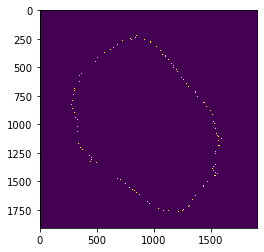

In [61]:
plt.imshow(A,interpolation='None')
# plt.scatter(indxy[1],indxy[0])

In [72]:
indxy = np.where(np.logical_and(distance_taxicab>30, distance_taxicab <50))
res = random.sample(range(1, indxy[0].shape[0]), 100)

seed_img = np.zeros_like(cell_mask)

for id_ID in range(100):
    seed_img[indxy[0][res[id_ID]],indxy[1][res[id_ID]]]=1

B = ndimage.correlate(seed_img, disk(5), mode='constant', origin=-1)



In [143]:
indxy = np.where(np.logical_and(distance_taxicab>30, distance_taxicab <500))
res = random.sample(range(1, indxy[0].shape[0]), 100)

seed_img = np.zeros_like(cell_mask)

for id_ID in range(100):
    seed_img[indxy[0][res[id_ID]],indxy[1][res[id_ID]]]=1

BB = ndimage.correlate(seed_img, disk(5), mode='constant', origin=-1)

In [176]:
indxy = np.where(np.logical_and(distance_taxicab>20, distance_taxicab <150))
res = random.sample(range(1, indxy[0].shape[0]), 100)

C = np.zeros_like(cell_mask)

for id_ID in range(100):
    seed_img = np.zeros_like(cell_mask)
    seed_img[indxy[0][res[id_ID]],indxy[1][res[id_ID]]]=1.0

    kk  = disk(25)
    S = kk[::5,:]
    SS = np.zeros_like(disk(25))
    SS[25-5:25+6] = kk[::5,:]

    S_rotate = transform.rotate(SS, 90 + 180/(np.pi)*local_orientation[indxy[0][res[id_ID]],indxy[1][res[id_ID]]], resize=False, center=None, order=None, mode='constant', cval=0, clip=True)

    model = S_rotate>S_rotate.mean()
    Cthis = ndimage.correlate(seed_img, model, mode='constant', origin=-1)
    C = C+Cthis
    # plt.imshow(S_rotate)

In [173]:
indxy = np.where(np.logical_and(distance_taxicab>0, distance_taxicab <20))
res = random.sample(range(1, indxy[0].shape[0]), 100)

CC = np.zeros_like(cell_mask)

for id_ID in range(100):
    seed_img = np.zeros_like(cell_mask)
    seed_img[indxy[0][res[id_ID]],indxy[1][res[id_ID]]]=1.0

    kk  = disk(25)
    S = kk[::5,:]
    SS = np.zeros_like(disk(25))
    SS[25-5:25+6] = kk[::5,:]

    S_rotate = transform.rotate(SS, random.randint(0,30)-15 + 180/(np.pi)*local_orientation[indxy[0][res[id_ID]],indxy[1][res[id_ID]]], resize=False, center=None, order=None, mode='constant', cval=0, clip=True)

    model = S_rotate>S_rotate.mean()
    CCthis = ndimage.correlate(seed_img, model, mode='constant', origin=-1)
    CC = CC+CCthis
    # plt.imshow(S_rotate)

In [172]:
rr = random.randint(0,30)-15
rr

10

In [157]:
rr

99

In [147]:
indxy = np.where(np.logical_and(distance_taxicab>300, distance_taxicab <800))
res = random.sample(range(1, indxy[0].shape[0]), 30)

D = np.zeros_like(cell_mask)

for id_ID in range(30):
    seed_img = np.zeros_like(cell_mask)
    seed_img[indxy[0][res[id_ID]],indxy[1][res[id_ID]]]=1.0

    kk  = disk(51)
    S = kk[::10,:]
    SS = np.zeros_like(disk(51))
    SS[25-5:25+6] = kk[::10,:]

    S_rotate = transform.rotate(SS, 90 + 180/(np.pi)*local_orientation[indxy[0][res[id_ID]],indxy[1][res[id_ID]]], resize=False, center=None, order=None, mode='constant', cval=0, clip=True)

    model = S_rotate>S_rotate.mean()
    Dthis = ndimage.correlate(seed_img, model, mode='constant', origin=-1)
    D = D+Dthis
    # plt.imshow(S_rotate)

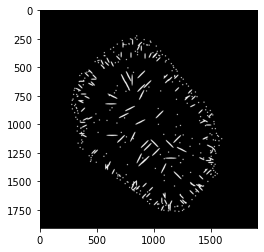

In [182]:
plt.imshow(A+B+BB+C+D>0,cmap=plt.cm.gray)

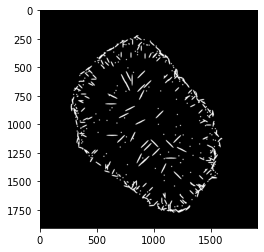

In [183]:
plt.imshow(A+B+BB+C+CC+D>0,cmap=plt.cm.gray)

In [83]:
bigger_for_orent_mask = binary_dilation(cell_mask, disk(21))
bigger_for_orent_distance_taxicab = distance_transform_cdt(bigger_for_orent_mask, metric="taxicab")

# obtain cell edge orientation based on gradient of the distance map    
n_v = skimage.filters.sobel_v(bigger_for_orent_distance_taxicab)
n_h = skimage.filters.sobel_h(bigger_for_orent_distance_taxicab)
# somehow the gradients are really small, make them reasonable values
for_plot_max = 5/min(n_v.max(), n_h.max())
n_v = n_v*for_plot_max
n_h = n_h*for_plot_max
        
# convert the directions into orientation angels   
local_orientation = np.arctan2(n_v,n_h)

In [80]:
indxy = np.where(np.logical_and(distance_taxicab>200,distance_taxicab<2000))
res = random.sample(range(1, indxy[0].shape[0]), 30)

seed_img = np.zeros_like(cell_mask)

for id_ID in range(30):
    seed_img[indxy[0][res[id_ID]],indxy[1][res[id_ID]]]=1


kk  = disk(51)
S = kk[::15,:]
D = ndimage.correlate(seed_img, S, mode='constant', origin=-1)

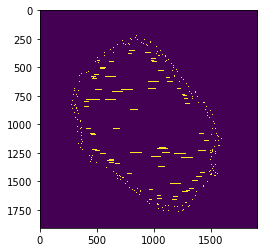

In [84]:
plt.imshow(A+B+C+D>0,interpolation='None')